# Coins classification
---

Complete the following cells in order to classify the following coins images:

![coins](https://github.com/octavio-navarro/Computer-Vision/blob/main/Assignments/images/coins.png?raw=1)

as follows:

![coins classification](https://github.com/octavio-navarro/Computer-Vision/blob/main/Assignments/images/coins_classification.png?raw=1)

Large coins count as 5 units, small copper coins count as 0.5 units, while small silver coins count as 1 unit.

#### Basic imports

In [1]:
!git clone https://github.com/octavio-navarro/Computer-Vision.git

Cloning into 'Computer-Vision'...
remote: Enumerating objects: 607, done.
remote: Counting objects: 100% (607/607), done.
remote: Compressing objects: 100% (595/595), done.
remote: Total 607 (delta 23), reused 592 (delta 11), pack-reused 0
Receiving objects: 100% (607/607), 135.99 MiB | 32.90 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

(718, 957, 3)


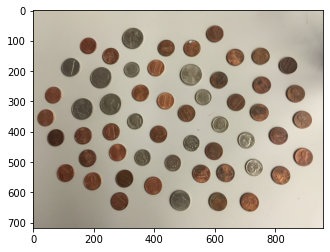

In [3]:
coins = cv2.imread('/content/Computer-Vision/Assignments/images/coins.png')
coins = cv2.cvtColor(coins, cv2.COLOR_BGR2RGB)

print(coins.shape)

plt.imshow(coins)

1. Select a color space that allows you to obtains a specific, and useful, characteristic from the coin image. Plot an image of said characteristic from the coins image. Remember to apply all the preprocessing steps that may be requiered.

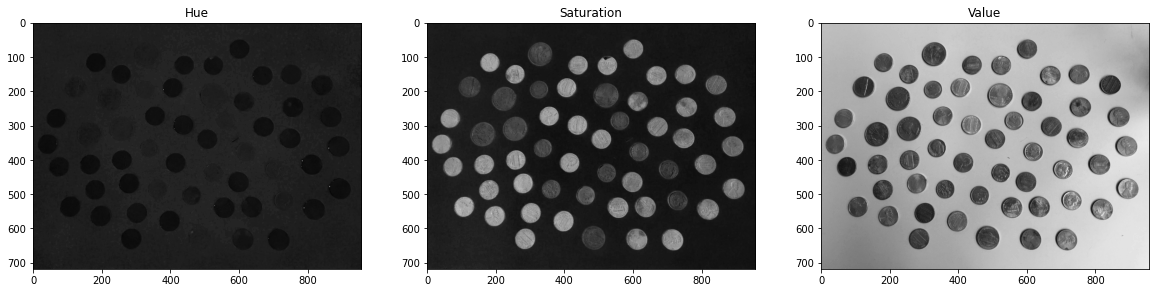

In [4]:
coins_copy = np.copy(coins)

# TO DO: Obtain a characteristic and plot it.
# Convert from RGB to HSV
hsv = cv2.cvtColor(coins, cv2.COLOR_RGB2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Hue')
ax1.imshow(h, cmap='gray')

ax2.set_title('Saturation')
ax2.imshow(s, cmap='gray')

ax3.set_title('Value')
ax3.imshow(v, cmap='gray')

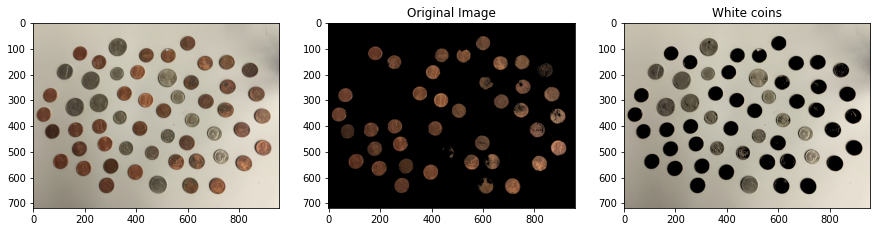

In [54]:
# Define our color selection criteria in HSV values
#Bronce
lower_hue = np.array([0,95,0]) 
upper_hue = np.array([15,255,255])

#Plata/Blanco
lower_saturation = np.array([0,0,70]) 
upper_saturation = np.array([55,85,255])

# Define the masked area in HSV space
#Bronce
mask_hsv = cv2.inRange(hsv, lower_hue, upper_hue)

# mask the image
masked_imageBrown = np.copy(coins)
masked_imageBrown[mask_hsv==0] = [0,0,0]

# Define the masked area in HSV space Plata/Blanco
mask_hsv = cv2.inRange(hsv, lower_saturation, upper_saturation)

# mask the image
masked_imageWhite = np.copy(coins)
masked_imageWhite[mask_hsv==0] = [0,0,1]


#print the results
f, ((ax3, ax2, ax1)) = plt.subplots(1, 3, figsize=(15,15))

ax2.set_title('Brown coin')
ax2.imshow(masked_imageBrown)

ax2.set_title('Original Image')
ax3.imshow(coins)

ax1.set_title('White coins')
ax1.imshow(masked_imageWhite)


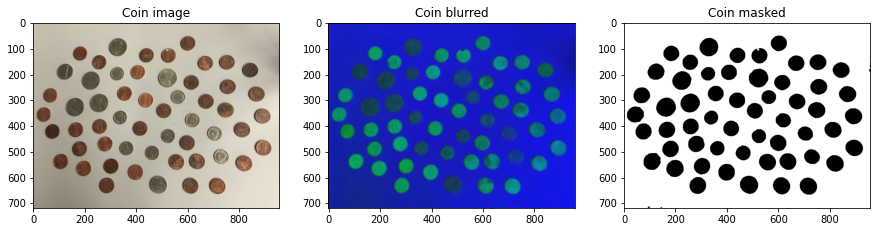

In [48]:
#blurr coins
blurred_coins = cv2.GaussianBlur(hsv, (11, 11), 0)
lower_value = np.array([15, 15, 125])
upper_value = np.array([40, 40, 255])

# Define the masked area
masked_coins = cv2.inRange(blurred_coins, lower_value, upper_value)
retval, binary = cv2.threshold(masked_coins, 25, 255, cv2.THRESH_BINARY)


#Vizualise the mask
#plt.imshow(masked_coins, cmap='gray')

f3, ((ax31,ax32, ax33)) = plt.subplots(1, 3, figsize=(15,15))
ax31.set_title('Coin image')
ax31.imshow(coins_copy)
ax32.set_title('Coin blurred')
ax32.imshow(blurred_coins)
ax33.set_title('Coin masked')
ax33.imshow(binary, cmap='gray')



2. Obtain the coin contours and plot and image of all the contours. Add all the code cells that may be required.

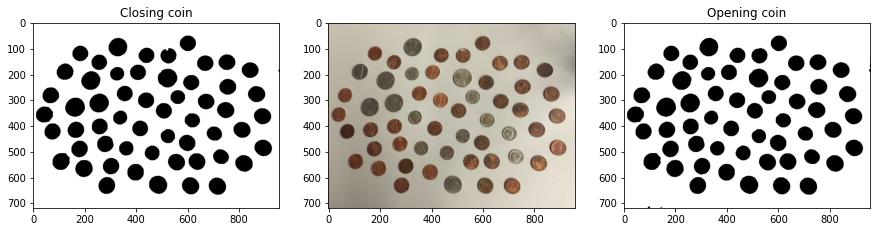

In [49]:
# TO DO: Plot an image of the contours of the coins.

#obtain the contours of the coins  by opening and closing
kernel = np.ones((7,7), np.uint8)

closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)


#print the results
f, ((ax3, ax2, ax1)) = plt.subplots(1, 3, figsize=(15,15))

ax3.set_title('Closing coin')
ax3.imshow(closing, cmap='gray')

ax2.imshow(coins)

ax1.set_title('Opening coin')
ax1.imshow(opening, cmap='gray')


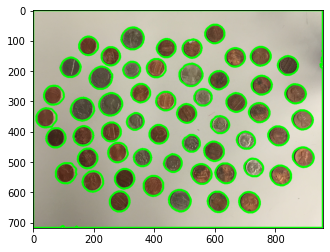

In [7]:
#Find contours
(contours, _) = cv2.findContours(opening, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#draw contours
coin_copy = np.copy(coins)
all_contours = cv2.drawContours(coin_copy, contours, -1, (0,255,0), 5)
plt.imshow(all_contours)

3. Using the contour features, obtain any feature that may be useful to classify the coins. Store the feature in a dictionary for future reference.

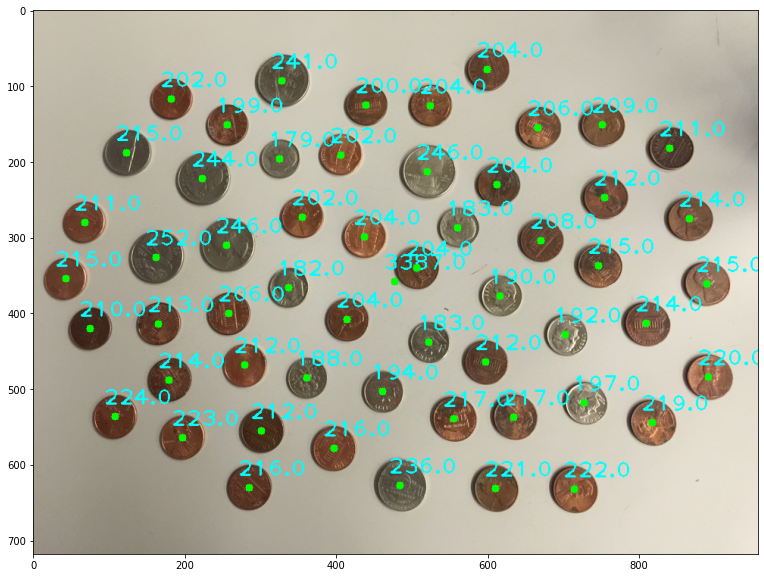

In [42]:
# TO DO: Obtain a useful contour feature to clasify the coins.

cropped_image = np.copy(coins)

#dictionary
coin_area = {}
coin_center ={}

for idx, selected_contour in enumerate(contours):
    if(selected_contour is not None):
      #The function computes a curve length or a closed contour perimeter
        total_area = cv2.arcLength(selected_contour, True)
        
        moments = cv2.moments(selected_contour)

        cx = int(moments['m10']/moments['m00'])
        cy = int(moments['m01']/moments['m00'])

        coin_center[idx] = (cx,cy)
        cv2.putText(cropped_image, str(total_area//1), (cx-15, cy-15), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 255), 2, cv2.LINE_8)
        coin_area[idx] = total_area
        cv2.circle(cropped_image, (cx, cy), 5, (0, 255, 0), -1)

f, ax = plt.subplots(1, 1, figsize=(20,10))
ax.imshow(cropped_image)

    

4. Separate the coins based on color. Obtain the average color of each coin, and store this information in a dictionary.

In [23]:
# TO DO: Obtain the average color of each coin, and store ir for future use.

#dictionary for color
average_coin_color = {}

for idx, selected_contour in enumerate(contours):
    if(selected_contour is not None):
        moments = cv2.moments(selected_contour)

        cx = int(moments['m10']/moments['m00'])
        cy = int(moments['m01']/moments['m00'])


        average_coin_color[idx] = coins[cy,cx] 





5. Using the information that you generated, plot an image that adds a text with the value of each coin to the image at the position of each coin. Large coins are worth 5 units, small silver coins are worth 1 unit, while small copper coins are worth 0.5 units.

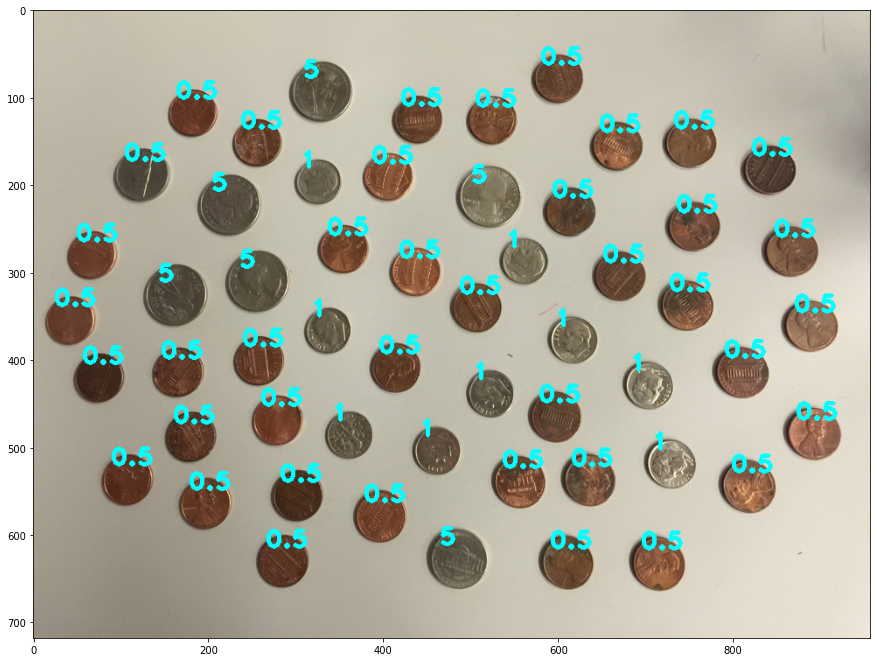

In [45]:
from IPython.core.display import Image
# TO DO: Using the dictionaries that you created, plot an image with the correct coin values

image = np.copy(coins)
#loop to check the contours similarity
for idx in range(len(contours)):
    if(selected_contour is not None):
      #use of dictionarys
        area_of_coin = coin_area[idx]
        average_of_coin = average_coin_color[idx]
        cx,cy = coin_center[idx]
      #values are not exact 
        if area_of_coin < 198:
          cv2.putText(image, "1", (cx-20, cy-15), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 255), 4, cv2.LINE_8)
        elif area_of_coin < 225 :
          cv2.putText(image, "0.5", (cx-20, cy-15), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 255), 4, cv2.LINE_8)
        elif area_of_coin < 260 :
          cv2.putText(image, "5", (cx-20, cy-15), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 255), 4, cv2.LINE_8)
  
#existe margen de error de una monedita :)

f, ax = plt.subplots(1, 1, figsize=(15,15))
ax.imshow(image)

       